In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# Ice Cream Data Correlation Plots

In [20]:
df_ice_cream = pd.read_csv("ice_cream.csv")
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [21]:
print(df_ice_cream.count())
# Rename the columns
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'},inplace=True)

DATE         577
IPN31152N    577
dtype: int64


In [22]:
df_ice_cream.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [23]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [24]:
df_ice_cream.set_index('date', inplace=True)

In [25]:
df_ice_cream.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [26]:
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [27]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


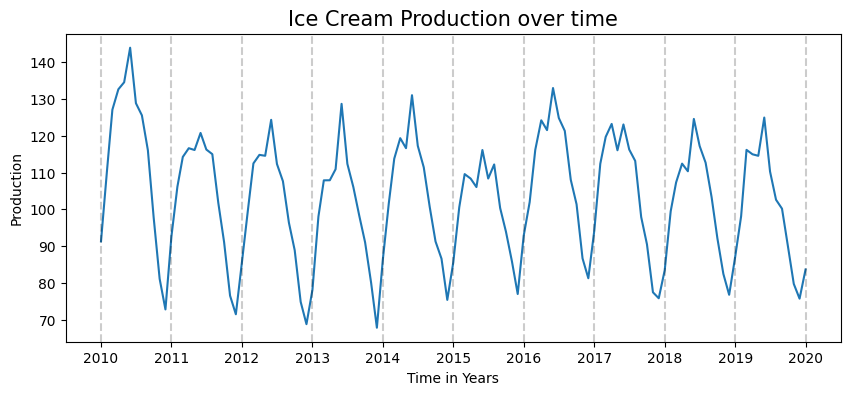

In [66]:
plt.figure(figsize= (10,4))
plt.plot(df_ice_cream.production)
plt.title("Ice Cream Production over time", fontsize = 15)
plt.ylabel('Production', fontsize = 10)
plt.xlabel('Time in Years', fontsize = 10)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color = 'k', linestyle='--', alpha=0.2)


## ACF PLOT

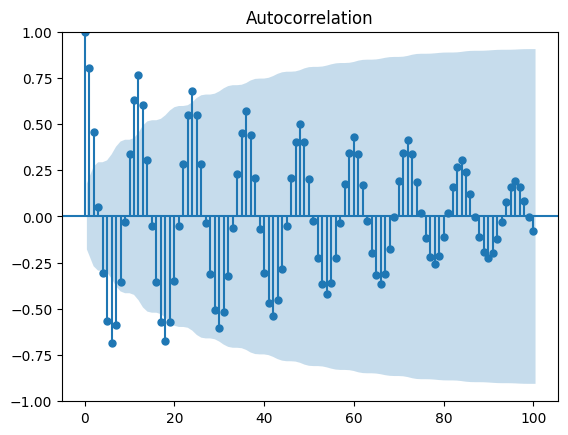

In [40]:
acf_plot = plot_acf(df_ice_cream.production, lags = 100)

Because the correlation is decaying we are likely dealing with an auto-regressive problem. If it was otherwise it may have been moving average.

## PACF PLOT

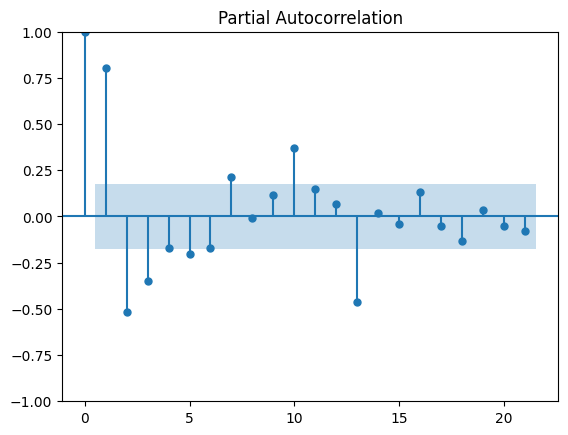

In [41]:
pacf_plot = plot_pacf(df_ice_cream.production)

# Stock Data Correlation Plots

In [45]:
import yfinance as yf

In [46]:
ticker = 'TSLA'

In [48]:
tickerData = yf.Ticker(ticker)

In [51]:
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2025-1-1')

In [52]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0
2015-01-05 00:00:00-05:00,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0
2015-01-06 00:00:00-05:00,14.004000,14.280000,13.614000,14.085333,93928500,0.0,0.0
2015-01-07 00:00:00-05:00,14.223333,14.318667,13.985333,14.063333,44526000,0.0,0.0
2015-01-08 00:00:00-05:00,14.187333,14.253333,14.000667,14.041333,51637500,0.0,0.0


In [53]:
tickerClose = tickerDf[['Close']]

In [54]:
tickerClose.head()

,Close
Date,
2015-01-02 00:00:00-05:00,14.620667
2015-01-05 00:00:00-05:00,14.006000
2015-01-06 00:00:00-05:00,14.085333
2015-01-07 00:00:00-05:00,14.063333
2015-01-08 00:00:00-05:00,14.041333


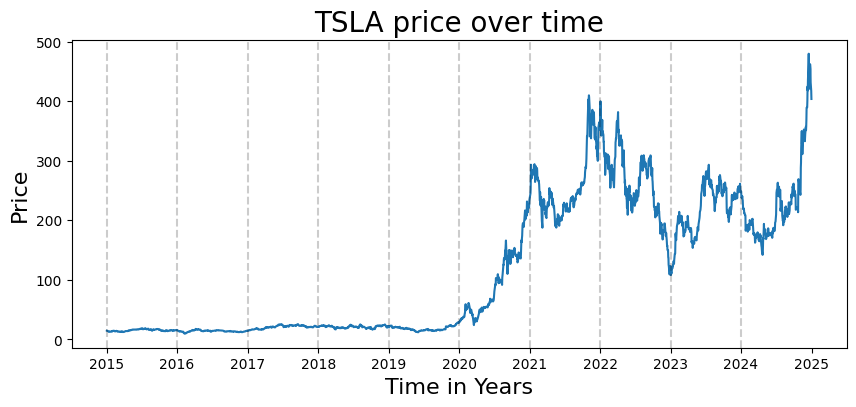

In [65]:
plt.figure(figsize=(10,4))
plt.plot(tickerClose.Close)
plt.title('%s price over time'%ticker, fontsize = 20)
plt.ylabel('Price', fontsize = 16)
plt.xlabel('Time in Years', fontsize = 16)
for year in range(2015,2025):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k', linestyle='--', alpha = 0.2)

## Stationarity: Take the first difference of this series.

In [67]:
first_diffs = tickerClose.Close.values[1:] - tickerClose.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [69]:
tickerClose['FirstDifference'] = first_diffs

/var/folders/c4/r352rgd11976t2t3272jf1q00000gn/T/ipykernel_6651/1483849408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerClose['FirstDifference'] = first_diffs


In [70]:
tickerClose.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,14.620667,-0.614668
2015-01-05 00:00:00-05:00,14.006000,0.079333
2015-01-06 00:00:00-05:00,14.085333,-0.022000
2015-01-07 00:00:00-05:00,14.063333,-0.021999
2015-01-08 00:00:00-05:00,14.041333,-0.264000


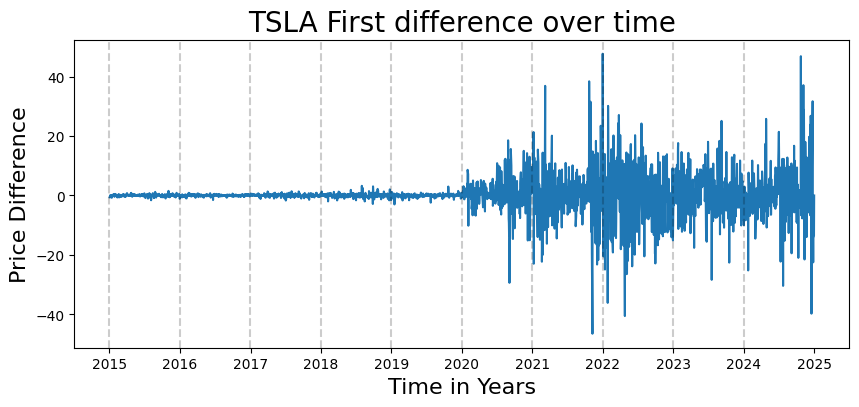

In [72]:
plt.figure(figsize=(10,4))
plt.plot(tickerClose.FirstDifference)
plt.title('%s First difference over time'%ticker, fontsize = 20)
plt.ylabel('Price Difference', fontsize = 16)
plt.xlabel('Time in Years', fontsize = 16)
for year in range(2015,2025):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k', linestyle='--', alpha = 0.2)

## ACF PLOT

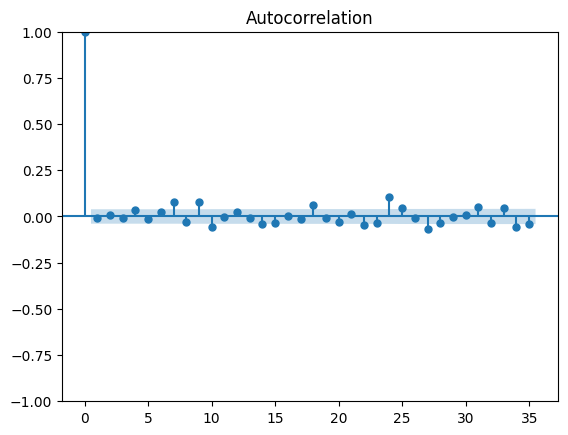

In [76]:
acf_plot = plot_acf(tickerClose.FirstDifference)

ACF doesn't tell us much

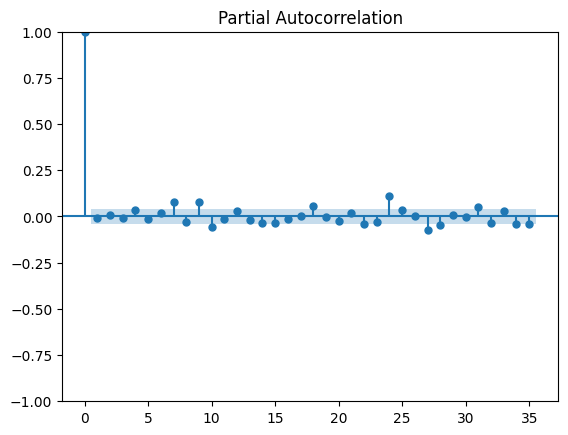

In [77]:
pacf_plot = plot_pacf(tickerClose.FirstDifference)

Neither does PACF, Stock price prediction is more difficult in comparison to ice-cream sales.